In [1]:
#import necessary libraries:
from mofapy2.run.entry_point import entry_point
import pandas as pd
import numpy as np
import requests

ent= entry_point()


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


In [2]:
#load lipidomics data:
lipidomics = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/DataMatrix_Hif1aLipidomics_2023_02_06.csv")
#print(lipidomics.shape)
print(lipidomics.shape)
lipidomics

(592, 44)


,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_34,CDCDHFD_ko_35,CDCDHFD_ko_36,CDCDHFD_wt_37,CDCDHFD_wt_38,HFDCDCD_ko_39,HFDCDCD_ko_40,HFDCDCD_wt_41,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,3.575227,4.566039,2.552531,0.000000,0.000000,0.000000,2.544966,24.036418,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,2.689101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,445.117716,180.419666,146.627023,55.652486,59.057491,118.723234,147.184311,37.291394,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,159.282750,72.702119,50.450863,49.904373,46.007444,55.617250,65.431712,66.179840,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,2.086477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,TAG(67:10)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
588,TAG(67:8)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162514,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
589,TAG(67:7)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
590,TAG(67:6)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.084070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
#remove features with more than 50% missing values:
data = []
for i in lipidomics.columns:
     #print(lipidomics[i].eq(0).mean())
     if lipidomics[i].eq(0).mean() <= 0.31:
        data.append(lipidomics[i])
lipidomics_wt = pd.DataFrame(data)
print(lipidomics_wt.shape)
lipidomics_wt.head()

(30, 592)


,0,1,2,3,4,5,6,7,8,9,...,582,583,584,585,586,587,588,589,590,591
Unnamed: 0,CE(14:0),CE(16:2),CE(16:1),CE(16:0),CE(18:4),CE(18:3),CE(18:2),CE(18:1),CE(18:0),CE(20:4),...,TAG(65:7)_TAGODD,TAG(65:6)_TAGODD,TAG(65:5)_TAGODD,TAG(65:4)_TAGODD,TAG(65:3)_TAGODD,TAG(67:10)_TAGODD,TAG(67:8)_TAGODD,TAG(67:7)_TAGODD,TAG(67:6)_TAGODD,TAG(67:5)_TAGODD
HFDHFDHFD_wt_1,6.650025,0.0,158.015359,107.574454,0.0,26.72863,369.692553,1114.417013,80.080463,218.553327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_2,0.0,0.0,451.752039,219.146989,0.0,40.986361,733.383586,3183.535166,135.345417,258.311087,...,0.0,0.920441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_3,4.181307,0.0,275.383565,112.307327,0.0,40.534273,524.852592,2288.963379,91.882237,255.231843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HFDHFDHFD_ko_4,0.0,0.0,166.915406,144.768134,0.0,87.011835,908.887192,2618.446432,149.793971,237.449718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lipidomics_wt.head()
lipidomics= lipidomics_wt.T
lipidomics.head()
lipidomics.shape

(592, 30)

In [5]:
data = []
for i in range(len(lipidomics)):
     #print(lipidomics.iloc[i].eq(0).mean())
     if lipidomics.iloc[i, 1:].eq(0).mean() <= 0.9:
        data.append(lipidomics.iloc[i])
lipidomics_remove_rows = pd.DataFrame(data)
lipidomics_remove_rows
lipidomics_remove_rows

,Unnamed: 0,HFDHFDHFD_wt_1,HFDHFDHFD_ko_2,HFDHFDHFD_ko_3,HFDHFDHFD_ko_4,HFDCDCD_wt_5,HFDCDCD_ko_6,HFDHFDHFD_ko_7,HFDHFDHFD_wt_8,HFDHFDHFD_wt_9,...,CDCDCD_ko_25,CDCDHFD_ko_28,CDCDHFD_wt_29,HFDHFDHFD_ko_30,HFDCDCD_ko_31,CDCDCD_ko_34,CDCDHFD_ko_36,CDCDHFD_wt_38,HFDCDCD_wt_42,HFDHFDHFD_wt_43
0,CE(14:0),6.650025,0.000000,4.181307,0.000000,10.938247,0.000000,3.522412,4.005629,3.575264,...,4.249713,0.000000,0.000000,8.757124,1.753378,3.575227,2.552531,0.000000,4.571681,12.281212
1,CE(16:2),0.000000,0.000000,0.000000,0.000000,6.957272,0.000000,3.000228,0.000000,4.394697,...,4.869585,0.000000,0.000000,2.186689,0.000000,2.689101,0.000000,0.000000,0.000000,0.000000
2,CE(16:1),158.015359,451.752039,275.383565,166.915406,786.966970,117.962915,351.729455,329.589851,195.499540,...,409.237245,45.995587,38.724764,222.207191,146.697250,445.117716,146.627023,59.057491,157.485707,152.060589
3,CE(16:0),107.574454,219.146989,112.307327,144.768134,310.988967,46.599473,174.689734,184.674411,146.272612,...,206.992598,39.816751,38.811357,159.831027,67.722213,159.282750,50.450863,46.007444,95.043575,140.242586
4,CE(18:4),0.000000,0.000000,0.000000,0.000000,2.806069,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.086477,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,TAG(65:9)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.103191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.209684
583,TAG(65:6)_TAGODD,0.000000,0.920441,0.000000,0.000000,0.462718,2.060842,0.235740,0.625479,0.000000,...,0.134879,0.519016,0.000000,0.432755,0.449036,0.302346,0.000000,0.000000,0.162093,1.260512
584,TAG(65:5)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002993,0.000000,0.000000,0.000000,...,0.000000,0.054963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001710
585,TAG(65:4)_TAGODD,0.000000,0.000000,0.000000,0.000000,0.213571,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.396127,0.000000,0.000000,0.000000,0.000000,0.166874,0.326771


In [6]:
import pandas as pd

num_features = 500  
# Select only numeric columns
numeric_cols = lipidomics_remove_rows.select_dtypes(include=[np.number])
gene_variance = numeric_cols.var(axis=1)

top_features = gene_variance.nlargest(num_features).index

df = lipidomics_remove_rows.loc[top_features]

print("Shape after feature selection:", df.shape)

Shape after feature selection: (500, 30)


In [7]:
import pandas as pd
import numpy as np

# Assuming `df` is your dataset where rows = features and columns = samples
num_features = len(df)  # Total number of features
num_to_remove = int(0.20 * num_features)  # Calculate 5% of total features

# Randomly select features to remove
features_to_remove = np.random.choice(df.index, num_to_remove, replace=False)

# Drop the selected features
df = df.drop(features_to_remove)

# Print the new shape
print("New dataset shape:", df.shape)




New dataset shape: (400, 30)


In [8]:
#lipodomics data:
#lipodomics data:
data_list = []

for i in range(len(df)):
    row = df.iloc[i, 1:].T.reset_index()
    row.columns = ['sample', 'value']  
    #print(row)
   
    feature = df.iloc[i, 0] 
    #print(feature)
    
    
    row['feature'] = feature
    
    
    lipid_class = feature.split("(")[0]
    #print(lipid_class)

    row['view'] = "Lipidomics"

    
    
    row['group'] = "group_A"
    data_list.append(row)

df1_lipidomics = pd.concat(data_list, ignore_index=True)

df1_lipidomics


,sample,value,feature,view,group
0,HFDHFDHFD_wt_1,275536.429425,TAG(52:3)_TAG2,Lipidomics,group_A
1,HFDHFDHFD_ko_2,107490.571914,TAG(52:3)_TAG2,Lipidomics,group_A
2,HFDHFDHFD_ko_3,41846.242039,TAG(52:3)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_4,66550.332235,TAG(52:3)_TAG2,Lipidomics,group_A
4,HFDCDCD_wt_5,45501.773973,TAG(52:3)_TAG2,Lipidomics,group_A
...,...,...,...,...,...
11595,CDCDCD_ko_34,0.0,PE(40:1),Lipidomics,group_A
11596,CDCDHFD_ko_36,0.0,PE(40:1),Lipidomics,group_A
11597,CDCDHFD_wt_38,0.354934,PE(40:1),Lipidomics,group_A
11598,HFDCDCD_wt_42,0.342897,PE(40:1),Lipidomics,group_A


In [9]:
#remove missing values:
final_lipodomics= df1_lipidomics[df1_lipidomics["value"] != 0]
final_lipodomics.head()
final_lipodomics.shape

(9963, 5)

In [10]:
#Normalization of lipidomics data:
#log2:
final_lipodomics["value"] = final_lipodomics["value"].apply(lambda x: np.log2(x + 1))
final_lipodomics

,sample,value,feature,view,group
0,HFDHFDHFD_wt_1,18.071889,TAG(52:3)_TAG2,Lipidomics,group_A
1,HFDHFDHFD_ko_2,16.713864,TAG(52:3)_TAG2,Lipidomics,group_A
2,HFDHFDHFD_ko_3,15.352845,TAG(52:3)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_4,16.022180,TAG(52:3)_TAG2,Lipidomics,group_A
4,HFDCDCD_wt_5,15.473667,TAG(52:3)_TAG2,Lipidomics,group_A
...,...,...,...,...,...
11586,CDCDCD_wt_19,0.517706,PE(40:1),Lipidomics,group_A
11588,CDCDCD_ko_23,0.309740,PE(40:1),Lipidomics,group_A
11590,CDCDCD_ko_25,0.594053,PE(40:1),Lipidomics,group_A
11597,CDCDHFD_wt_38,0.438222,PE(40:1),Lipidomics,group_A


In [11]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = True)
final_lipodomics.head()


,sample,value,feature,view,group
11310,HFDHFDHFD_wt_1,-0.038046,TAG(47:4)_TAGODD,Lipidomics,group_A
5946,HFDHFDHFD_ko_2,-0.008250,TAG(51:5)_TAGODD,Lipidomics,group_A
9252,HFDHFDHFD_ko_2,-0.007379,TAG(43:4)_TAGODD,Lipidomics,group_A
5957,HFDCDCD_wt_15,-0.007166,TAG(51:5)_TAGODD,Lipidomics,group_A
11313,HFDHFDHFD_ko_4,-0.006870,TAG(47:4)_TAGODD,Lipidomics,group_A


In [12]:
final_lipodomics.describe()

,value
count,9963.000000
mean,4.600701
std,3.420054
min,-0.038046
25%,1.826222
50%,3.835623
75%,6.702584
max,18.071889


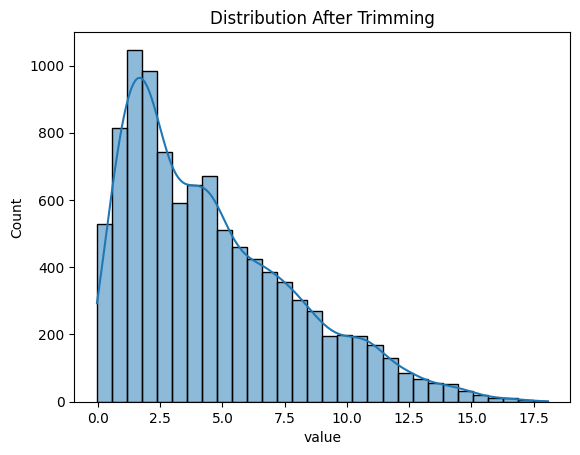

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

In [14]:
Q1 = final_lipodomics["value"].quantile(0.25)
Q3 = final_lipodomics["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_lipodomics = final_lipodomics[(final_lipodomics["value"] >= lower_bound) & (final_lipodomics["value"] <= upper_bound)]


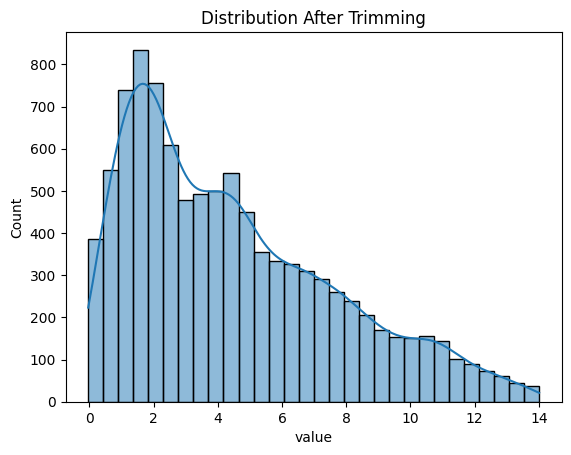

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_lipodomics["value"], kde=True, bins=30)
plt.title("Distribution After Trimming")
plt.show()

In [16]:
final_lipodomics.describe()

,value
count,9845.000000
mean,4.475057
std,3.239466
min,-0.038046
25%,1.807641
50%,3.778060
75%,6.553550
max,14.011117


In [17]:
#remove values less than 2.09 :
#final_lipodomics = final_lipodomics[final_lipodomics["value"] >= 1]
#final_lipodomics

In [18]:
#remove values greater than 6:
#final_lipodomics = final_lipodomics[final_lipodomics["value"] <= 10]
#final_lipodomics

In [19]:
#sort values ascending:
final_lipodomics = final_lipodomics.sort_values(by = "value", ascending = False)
final_lipodomics

,sample,value,feature,view,group
96,HFDHFDHFD_ko_10,14.011117,TAG(54:5)_TAG2,Lipidomics,group_A
154,HFDHFDHFD_ko_10,14.005182,TAG(54:4)_TAG2,Lipidomics,group_A
172,HFDCDCD_wt_42,13.985635,TAG(54:4)_TAG2,Lipidomics,group_A
177,HFDHFDHFD_ko_4,13.973855,TAG(56:7)_TAG2,Lipidomics,group_A
660,HFDHFDHFD_ko_30,13.940648,TAG(50:1)_TAG,Lipidomics,group_A
...,...,...,...,...,...
11313,HFDHFDHFD_ko_4,-0.006870,TAG(47:4)_TAGODD,Lipidomics,group_A
5957,HFDCDCD_wt_15,-0.007166,TAG(51:5)_TAGODD,Lipidomics,group_A
9252,HFDHFDHFD_ko_2,-0.007379,TAG(43:4)_TAGODD,Lipidomics,group_A
5946,HFDHFDHFD_ko_2,-0.008250,TAG(51:5)_TAGODD,Lipidomics,group_A


-----------------------------------------------------------------------------------------------------------------------------------------------

Transcriptomics_HC

In [20]:
#load transcriptomics HC data by identifier
transcriptomics_hepatocyte=pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/CountMatrix_Hepatocytes_RNAseq (1).csv")
transcriptomics_hepatocyte.head()
transcriptomics_hepatocyte.shape

(53464, 34)

In [21]:
#replace the identifiers to gene:
#load the gene mapping file:
gene= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_Hepatocytes_RNAseq (1).csv")
print(gene.columns)  # Print the column names to identify the correct column name
gene.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [22]:
transcriptomics_hepatocyte['Unnamed: 0'] = gene['SYMBOL'] 
transcriptomics_hepatocyte.head()

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12654,ID_12677
0,Gnai3,213,1186,335,573,145,204,265,254,83,...,787,70,131,65,71,3,43,146,38,48
1,Pbsn,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cdc45,124,220,126,269,65,436,489,81,19,...,224,0,68,0,8,0,0,0,0,0
3,H19,26,9,0,0,3,8,0,0,4,...,0,0,2,0,0,0,0,0,0,0
4,Scml2,0,11,0,8,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
hepatocyte_lenghts = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/Indentifires_hc - Copy.csv")
hepatocyte_lenghts.head()

,Unnamed: 0.1,Unnamed: 0,gene_length
0,0,ENSMUSG00000000001,38866.0
1,1,ENSMUSG00000000003,15722.0
2,2,ENSMUSG00000000028,31540.0
3,3,ENSMUSG00000000031,4695.0
4,4,ENSMUSG00000000037,175688.0


In [24]:
#only keep the gene length column
hepatocyte_lenghts = hepatocyte_lenghts["gene_length"]
hepatocyte_lenghts.head()

0     38866.0
1     15722.0
2     31540.0
3      4695.0
4    175688.0
Name: gene_length, dtype: float64

In [25]:
#add gene length to the transcriptomics data
hepatocyte_lenghts.reset_index(drop=True, inplace=True)
transcriptomics_hepatocyte["gene_length"] = hepatocyte_lenghts
transcriptomics_hepatocyte.head()
transcriptomics_hepatocyte.shape

(53464, 35)

In [26]:
df =transcriptomics_hepatocyte.set_index('Unnamed: 0').iloc[:,]
df.shape

(53464, 34)

In [27]:
#TPM normalization:
from bioinfokit.analys import norm
nm = norm()
nm.tpm(df, gl='gene_length')
tpm_df = nm.tpm_norm
tpm_df

,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,ID_12631,...,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12654,ID_12677
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,0.589090,3.781936,0.962331,1.239237,0.479537,0.510418,0.316707,0.962539,0.295138,1.168248,...,2.165773,0.204398,0.382907,0.118526,0.318922,0.011584,0.162282,0.539562,0.090924,0.108311
Pbsn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cdc45,0.422603,0.864491,0.446024,0.716902,0.264896,1.344281,0.720160,0.378249,0.083255,1.644928,...,0.759617,0.000000,0.244929,0.000000,0.044282,0.000000,0.000000,0.000000,0.000000,0.000000
H19,0.595264,0.237578,0.000000,0.000000,0.082132,0.165699,0.000000,0.000000,0.117745,0.000000,...,0.000000,0.000000,0.048393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Scml2,0.000000,0.007760,0.000000,0.003828,0.000000,0.000000,0.001322,0.000000,0.000000,0.006283,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC154323.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC109172.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AC114008.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.558953,...,0.794626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
#remove % of features with 0 values:
df_reset = tpm_df.reset_index(drop=False)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.73:
        data.append(df_reset[i])
df_hepatocyte_1 = pd.DataFrame(data)
print(df_hepatocyte_1.shape)

(30, 49417)


In [29]:
df= df_hepatocyte_1.T
df

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12603,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12677
0,Gnai3,0.58909,3.781936,0.962331,1.239237,0.479537,0.510418,0.316707,0.962539,0.295138,...,0.555121,2.165773,0.204398,0.382907,0.118526,0.318922,0.011584,0.162282,0.539562,0.108311
1,Pbsn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45,0.422603,0.864491,0.446024,0.716902,0.264896,1.344281,0.72016,0.378249,0.083255,...,0.173012,0.759617,0.0,0.244929,0.0,0.044282,0.0,0.0,0.0,0.0
3,H19,0.595264,0.237578,0.0,0.0,0.082132,0.165699,0.0,0.0,0.117745,...,0.0,0.0,0.0,0.048393,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2,0.0,0.00776,0.0,0.003828,0.0,0.0,0.001322,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,AC154323.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49413,AC109172.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49414,AC114008.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.794626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49415,AC156016.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.4:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,...,ID_12603,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12677
0,Gnai3,0.589090,3.781936,0.962331,1.239237,0.479537,0.510418,0.316707,0.962539,0.295138,...,0.555121,2.165773,0.204398,0.382907,0.118526,0.318922,0.011584,0.162282,0.539562,0.108311
2,Cdc45,0.422603,0.864491,0.446024,0.716902,0.264896,1.344281,0.720160,0.378249,0.083255,...,0.173012,0.759617,0.000000,0.244929,0.000000,0.044282,0.000000,0.000000,0.000000,0.000000
5,Apoh,15.112471,17.393191,16.831544,7.392567,29.026509,12.903979,8.148061,4.577604,2.334443,...,5.424029,6.076368,19.367798,27.912383,10.493726,65.770684,43.595898,44.966968,39.591331,28.538847
6,Narf,2.715733,6.195827,1.374365,4.116279,1.955365,2.033443,2.257185,1.836789,1.084643,...,0.816808,7.031557,0.158613,0.879370,0.293345,1.219992,0.613089,0.898861,1.189039,0.188572
7,Cav2,2.561892,5.173138,0.802512,0.710184,0.307967,0.000000,0.000000,1.430118,0.801681,...,0.201143,6.393125,0.085867,1.618816,0.187679,0.044030,0.473108,0.000000,1.304120,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49369,AC160336.1,210.084183,428.168293,153.057695,183.125949,166.097104,93.315786,97.795250,204.595343,266.330234,...,82.624662,278.048475,41.713348,82.476517,16.985864,30.758467,52.424128,25.218977,40.489870,37.163424
49380,AC120375.2,8.143258,3.442681,3.947140,0.212263,0.649171,0.245567,3.401610,2.603498,9.422924,...,1.059984,2.700927,0.000000,0.860634,0.000000,0.000000,0.378964,0.000000,0.000000,0.442931
49384,CT009530.1,0.440484,0.276344,0.087467,1.119465,0.007746,0.111344,0.055984,0.142011,0.158241,...,0.025296,0.831470,0.013678,0.006846,0.000000,0.000000,0.009044,0.000000,0.086558,0.005285
49401,AC137871.4,0.072265,0.030299,0.040942,0.035961,0.023567,0.172356,0.036905,0.081014,0.135145,...,0.020523,0.032684,0.034680,0.000000,0.004331,0.053349,0.000000,0.008965,0.158014,0.053600


In [31]:
df =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df.head()

,ID_12581,ID_12582,ID_12583,ID_12591,ID_12595,ID_12572,ID_12590,ID_12629,ID_12630,ID_12631,...,ID_12603,ID_12619,ID_12693,ID_12618,ID_12655,ID_12665,ID_12690,ID_12691,ID_12692,ID_12677
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3,0.589090,3.781936,0.962331,1.239237,0.479537,0.510418,0.316707,0.962539,0.295138,1.168248,...,0.555121,2.165773,0.204398,0.382907,0.118526,0.318922,0.011584,0.162282,0.539562,0.108311
Cdc45,0.422603,0.864491,0.446024,0.716902,0.264896,1.344281,0.720160,0.378249,0.083255,1.644928,...,0.173012,0.759617,0.000000,0.244929,0.000000,0.044282,0.000000,0.000000,0.000000,0.000000
Apoh,15.112471,17.393191,16.831544,7.392567,29.026509,12.903979,8.148061,4.577604,2.334443,4.662441,...,5.424029,6.076368,19.367798,27.912383,10.493726,65.770684,43.595898,44.966968,39.591331,28.538847
Narf,2.715733,6.195827,1.374365,4.116279,1.955365,2.033443,2.257185,1.836789,1.084643,4.252507,...,0.816808,7.031557,0.158613,0.879370,0.293345,1.219992,0.613089,0.898861,1.189039,0.188572
Cav2,2.561892,5.173138,0.802512,0.710184,0.307967,0.000000,0.000000,1.430118,0.801681,3.136628,...,0.201143,6.393125,0.085867,1.618816,0.187679,0.044030,0.473108,0.000000,1.304120,0.000000


In [32]:
import pandas as pd

num_features = 500  
gene_variance = df.var(axis=1)


top_features = gene_variance.nlargest(num_features).index


df = df.loc[top_features]

print("Shape after feature selection:", df.shape)


Shape after feature selection: (500, 29)


In [33]:
import pandas as pd
import numpy as np

# Assuming `df` is your dataset where rows = features and columns = samples
num_features = len(df)  # Total number of features
num_to_remove = int(0.20 * num_features)  # Calculate 5% of total features

# Randomly select features to remove
features_to_remove = np.random.choice(df.index, num_to_remove, replace=False)

# Drop the selected features
df_hc = df.drop(features_to_remove)

# Print the new shape
print("New dataset shape:", df_hc.shape)


New dataset shape: (400, 29)


In [34]:
#transcriptomics HC data:

data_list = []
 
for i in range(len(df_hc)):
    row = df_hc.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(df_hc.index[i])
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_hc"

    
    
    row['group'] = "group_B"
    data_list.append(row)


final_trans_hc = pd.concat(data_list, ignore_index=True)
final_trans_hc

,sample,value,feature,view,group
0,ID_12581,121380.408546,mt-Co3,transcriptomics_hc,group_B
1,ID_12582,56410.584702,mt-Co3,transcriptomics_hc,group_B
2,ID_12583,82358.479142,mt-Co3,transcriptomics_hc,group_B
3,ID_12591,87872.802501,mt-Co3,transcriptomics_hc,group_B
4,ID_12595,124248.074631,mt-Co3,transcriptomics_hc,group_B
...,...,...,...,...,...
11595,ID_12665,4.829696,Ndufb8,transcriptomics_hc,group_B
11596,ID_12690,4.107909,Ndufb8,transcriptomics_hc,group_B
11597,ID_12691,8.393307,Ndufb8,transcriptomics_hc,group_B
11598,ID_12692,8.846435,Ndufb8,transcriptomics_hc,group_B


In [35]:
#remove missing values:
final_transcriptomics_hc= final_trans_hc[final_trans_hc["value"] != 0]
final_transcriptomics_hc.head()
final_transcriptomics_hc.shape


(11452, 5)

In [36]:
final_transcriptomics_hc

,sample,value,feature,view,group
0,ID_12581,121380.408546,mt-Co3,transcriptomics_hc,group_B
1,ID_12582,56410.584702,mt-Co3,transcriptomics_hc,group_B
2,ID_12583,82358.479142,mt-Co3,transcriptomics_hc,group_B
3,ID_12591,87872.802501,mt-Co3,transcriptomics_hc,group_B
4,ID_12595,124248.074631,mt-Co3,transcriptomics_hc,group_B
...,...,...,...,...,...
11595,ID_12665,4.829696,Ndufb8,transcriptomics_hc,group_B
11596,ID_12690,4.107909,Ndufb8,transcriptomics_hc,group_B
11597,ID_12691,8.393307,Ndufb8,transcriptomics_hc,group_B
11598,ID_12692,8.846435,Ndufb8,transcriptomics_hc,group_B


In [37]:
#sort values descending:
final_transcriptomics_hc.sort_values(by='value', ascending=True)


,sample,value,feature,view,group
3735,ID_12655,0.009022,Krt19,transcriptomics_hc,group_B
9796,ID_12655,0.036645,Cox7a1,transcriptomics_hc,group_B
10004,ID_12677,0.043395,Tmem102,transcriptomics_hc,group_B
8523,ID_12691,0.046257,Prg2,transcriptomics_hc,group_B
5185,ID_12655,0.055455,Msmp,transcriptomics_hc,group_B
...,...,...,...,...,...
13,ID_12647,205422.818660,mt-Co3,transcriptomics_hc,group_B
23,ID_12655,209913.309270,mt-Co3,transcriptomics_hc,group_B
28,ID_12677,216965.743268,mt-Co3,transcriptomics_hc,group_B
24,ID_12665,219296.467680,mt-Co3,transcriptomics_hc,group_B


In [38]:
final_transcriptomics_hc.describe()

,value
count,11452.000000
mean,2146.094161
std,13293.331795
min,0.009022
25%,18.456059
50%,51.215723
75%,169.689846
max,237495.963925


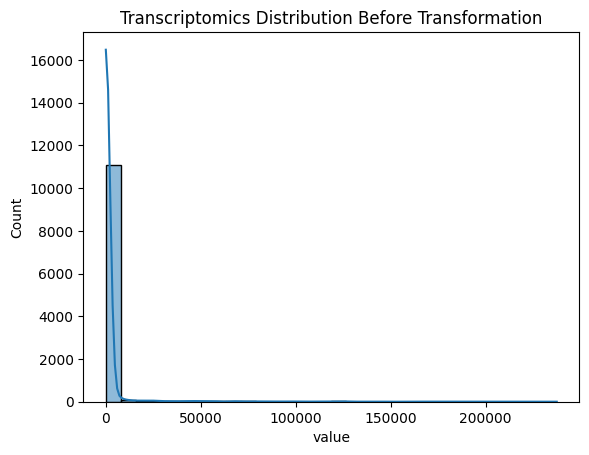

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [40]:
Q1 = final_transcriptomics_hc["value"].quantile(0.25)
Q3 = final_transcriptomics_hc["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_transcriptomics_hc = final_transcriptomics_hc[(final_transcriptomics_hc["value"] >= lower_bound) & (final_transcriptomics_hc["value"] <= upper_bound)]


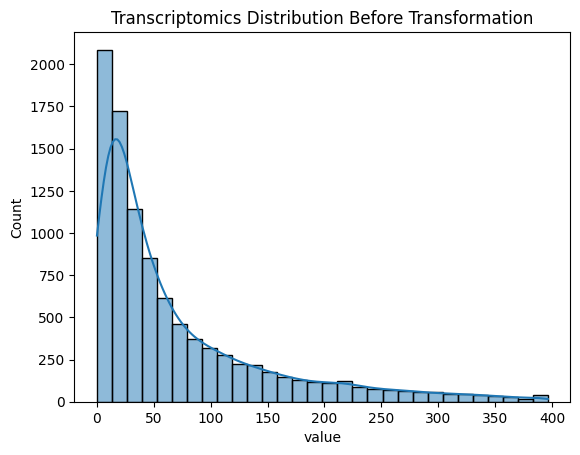

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [42]:
#remove values less than 0.09 :
#final_trans_hc = final_trans_hc[final_trans_hc["value"] >= 1]
#final_trans_hc

In [43]:
#remove values greater than 7.09:
#final_trans_hc= final_trans_hc[final_trans_hc["value"] <= 10]
#final_trans_hc

In [44]:
final_transcriptomics_hc.describe()

,value
count,9753.000000
mean,70.268592
std,79.904508
min,0.009022
25%,15.446515
50%,38.180525
75%,95.071077
max,396.377578


In [45]:
#sort values descending:
final_transcriptomics_hc= final_transcriptomics_hc.sort_values(by = "value", ascending = False)
final_transcriptomics_hc

,sample,value,feature,view,group
619,ID_12602,396.377578,Alb,transcriptomics_hc,group_B
2918,ID_12666,395.730313,Fga,transcriptomics_hc,group_B
2177,ID_12583,395.644655,Gm10177,transcriptomics_hc,group_B
1803,ID_12572,395.403137,Gm15500,transcriptomics_hc,group_B
3076,ID_12583,394.808139,Hspa8,transcriptomics_hc,group_B
...,...,...,...,...,...
5185,ID_12655,0.055455,Msmp,transcriptomics_hc,group_B
8523,ID_12691,0.046257,Prg2,transcriptomics_hc,group_B
10004,ID_12677,0.043395,Tmem102,transcriptomics_hc,group_B
9796,ID_12655,0.036645,Cox7a1,transcriptomics_hc,group_B


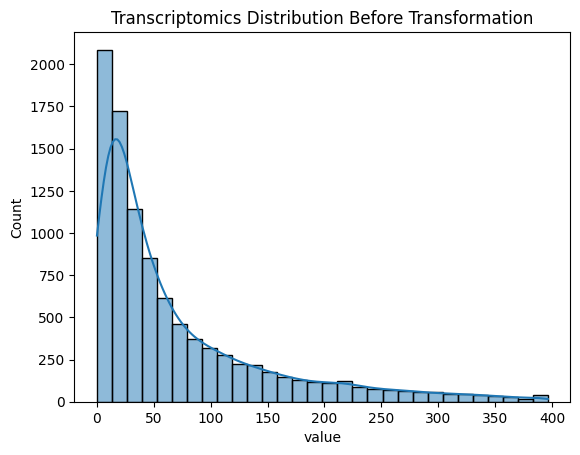

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_transcriptomics_hc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

---------------------------------------------------------------------------------------------------------------------------

 transcriptomics KC

In [47]:
#load transcriptomics KC data:
transcriptomics_kc = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/CountMatrix_KupfferCells_RNAseq.csv", sep="\,")
transcriptomics_kc.columns.values[0] = "Unnamed: 0"
transcriptomics_kc.head()

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12597""","""ID_12607""","""ID_12649""","""ID_12656""","""ID_12678""","""ID_12680""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,"""ENSMUSG00000000001.4""",658,765,869,604,306,379,289,637,947,...,460,781,68,114,757,826,71,642,436,609
1,"""ENSMUSG00000000003.15""",0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,"""ENSMUSG00000000028.14""",0,119,129,133,44,266,58,70,160,...,108,129,13,5,0,22,0,8,18,58
3,"""ENSMUSG00000000031.16""",0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"""ENSMUSG00000000037.16""",0,5,1,0,0,1,0,0,2,...,0,6,0,0,0,0,0,0,0,0


In [48]:
#replace the identifiers to gene:
#load the gene mapping file:
gene_kc= pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/RowAnno_KupfferCells_RNAseq.csv")
print(gene_kc.columns)  # Print the column names to identify the correct column name
gene_kc.head()

Index(['Unnamed: 0', 'GENEID', 'SYMBOL', 'GENETYPE'], dtype='object')


,Unnamed: 0,GENEID,SYMBOL,GENETYPE
0,ENSMUSG00000000001.4,ENSMUSG00000000001.4,Gnai3,protein_coding
1,ENSMUSG00000000003.15,ENSMUSG00000000003.15,Pbsn,protein_coding
2,ENSMUSG00000000028.14,ENSMUSG00000000028.14,Cdc45,protein_coding
3,ENSMUSG00000000031.16,ENSMUSG00000000031.16,H19,lincRNA
4,ENSMUSG00000000037.16,ENSMUSG00000000037.16,Scml2,protein_coding


In [49]:
#merge symbol to the unamed column
transcriptomics_kc['Unnamed: 0'] =  gene_kc['SYMBOL'] + "__" + gene_kc['GENEID']
transcriptomics_kc.head()

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12597""","""ID_12607""","""ID_12649""","""ID_12656""","""ID_12678""","""ID_12680""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,658,765,869,604,306,379,289,637,947,...,460,781,68,114,757,826,71,642,436,609
1,Pbsn__ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
2,Cdc45__ENSMUSG00000000028.14,0,119,129,133,44,266,58,70,160,...,108,129,13,5,0,22,0,8,18,58
3,H19__ENSMUSG00000000031.16,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Scml2__ENSMUSG00000000037.16,0,5,1,0,0,1,0,0,2,...,0,6,0,0,0,0,0,0,0,0


In [50]:
trans_kc_lenghts = pd.read_csv("C:/Users/beyra/Desktop/Git Repositories/WT&KO_data/Indentifires_kc - Copy.csv")
trans_kc_lenghts.head()

,Unnamed: 0.1,Unnamed: 0,gene_length
0,0,ENSMUSG00000000001,38866.0
1,1,ENSMUSG00000000003,15722.0
2,2,ENSMUSG00000000028,31540.0
3,3,ENSMUSG00000000031,4695.0
4,4,ENSMUSG00000000037,175688.0


In [51]:
kc_lenghts = trans_kc_lenghts["gene_length"]
kc_lenghts.head()

0     38866.0
1     15722.0
2     31540.0
3      4695.0
4    175688.0
Name: gene_length, dtype: float64

In [52]:
#add gene length to the transcriptomics data
kc_lenghts.reset_index(drop=True, inplace=True)
transcriptomics_kc["gene_length"] = kc_lenghts
transcriptomics_kc.head()
transcriptomics_kc

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12607""","""ID_12649""","""ID_12656""","""ID_12678""","""ID_12680""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670""",gene_length
0,Gnai3__ENSMUSG00000000001.4,658,765,869,604,306,379,289,637,947,...,781,68,114,757,826,71,642,436,609,38866.0
1,Pbsn__ENSMUSG00000000003.15,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,15722.0
2,Cdc45__ENSMUSG00000000028.14,0,119,129,133,44,266,58,70,160,...,129,13,5,0,22,0,8,18,58,31540.0
3,H19__ENSMUSG00000000031.16,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,4695.0
4,Scml2__ENSMUSG00000000037.16,0,5,1,0,0,1,0,0,2,...,6,0,0,0,0,0,0,0,0,175688.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53459,AC107711.6__ENSMUSG00000115846.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
53460,AC109172.2__ENSMUSG00000115847.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,380.0
53461,AC114008.2__ENSMUSG00000115848.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1346.0
53462,AC156016.5__ENSMUSG00000115849.1,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354.0


In [53]:
#TPM normalization:
from bioinfokit.analys import norm

# Set 'Unnamed: 0' as the index
transcriptomics_kc.set_index('Unnamed: 0', inplace=True)

nm = norm()
nm.tpm(transcriptomics_kc, gl='gene_length')
tpm_df_kc = nm.tpm_norm
tpm_df_kc.head()
tpm_df_kc.shape

(49417, 35)

In [54]:
#remove % of features with 0 values:
df_reset = tpm_df_kc.reset_index(drop=False)
data = []
for i in df_reset.columns:
     #print(df_reset[i].eq(0).mean())
     if df_reset[i].eq(0).mean() <= 0.7:
        data.append(df_reset[i])
df_kc_1 = pd.DataFrame(data)
print(df_kc_1.shape)

(29, 49417)


In [55]:
df = df_kc_1.T
df

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12558""","""ID_12681""","""ID_12597""","""ID_12607""","""ID_12656""","""ID_12678""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,4.079295,5.465623,3.340538,2.967157,1.208476,1.822909,0.779309,1.731613,2.191367,...,6.141972,1.200911,2.001887,2.735269,0.374947,1.331693,0.180325,1.853756,1.284877,1.197935
1,Pbsn__ENSMUSG00000000003.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Cdc45__ENSMUSG00000000028.14,0.0,1.047691,0.611075,0.805125,0.21413,1.576578,0.192729,0.234486,0.45624,...,0.816929,0.055889,0.57918,0.556733,0.020265,0.0,0.0,0.028465,0.065367,0.140589
3,H19__ENSMUSG00000000031.16,0.0,0.0,0.0,0.0,0.0,0.0,0.066968,0.0,0.0,...,1.614104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Scml2__ENSMUSG00000000037.16,0.0,0.007903,0.00085,0.0,0.0,0.001064,0.0,0.0,0.001024,...,0.0,0.0,0.0,0.004649,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49412,AC154323.3__ENSMUSG00000115845.1,0.0,0.0,0.0,0.0,0.0,0.026303,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49413,AC109172.2__ENSMUSG00000115847.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.445111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49414,AC114008.2__ENSMUSG00000115848.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49415,AC156016.5__ENSMUSG00000115849.1,0.0,0.0,2.110247,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data = []
for i in range(len(df)):
     #print(df.iloc[i].eq(0).mean())
     if df.iloc[i, 1:].eq(0).mean() <= 0.25:
        data.append(df.iloc[i])
hc_remove_rows = pd.DataFrame(data)
hc_remove_rows

,Unnamed: 0,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""",...,"""ID_12558""","""ID_12681""","""ID_12597""","""ID_12607""","""ID_12656""","""ID_12678""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
0,Gnai3__ENSMUSG00000000001.4,4.079295,5.465623,3.340538,2.967157,1.208476,1.822909,0.779309,1.731613,2.191367,...,6.141972,1.200911,2.001887,2.735269,0.374947,1.331693,0.180325,1.853756,1.284877,1.197935
2,Cdc45__ENSMUSG00000000028.14,0.000000,1.047691,0.611075,0.805125,0.214130,1.576578,0.192729,0.234486,0.456240,...,0.816929,0.055889,0.579180,0.556733,0.020265,0.000000,0.000000,0.028465,0.065367,0.140589
5,Apoh__ENSMUSG00000000049.11,2.815088,8.446712,13.918040,4.001778,11.148621,9.230815,7.426425,0.762928,0.939342,...,0.138674,9.229291,2.345160,4.130973,26.328331,10.408530,3.138830,19.381234,20.148159,8.481095
6,Narf__ENSMUSG00000000056.7,4.792342,7.791761,8.039288,4.905896,4.150225,3.848677,1.171823,2.692009,2.035326,...,4.806911,0.539699,2.100296,2.034139,0.735251,0.716687,0.164492,1.116031,0.449453,0.682199
7,Cav2__ENSMUSG00000000058.6,0.303848,2.521201,0.678259,1.998381,0.309694,0.212161,1.057301,0.572897,0.340238,...,5.542707,0.280278,1.407739,1.304545,0.128959,0.008622,0.037343,0.566075,0.433304,0.424195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49378,AC132863.2__ENSMUSG00000115810.1,5.555384,3.891568,0.337716,1.553677,0.069391,1.605699,0.000000,0.525398,1.219751,...,8.564894,0.000000,1.682244,0.000000,0.057790,0.030910,0.044625,0.456609,0.776696,0.069124
49380,AC120375.2__ENSMUSG00000115812.1,1.216925,2.103653,4.150152,0.000000,3.100855,0.472064,2.646590,5.869602,5.223571,...,0.000000,0.000000,1.708505,0.343735,1.291218,0.000000,0.000000,0.850185,1.735405,1.158355
49384,CT009530.1__ENSMUSG00000115816.1,2.294220,0.836695,0.594237,0.103554,0.295996,0.619594,0.176843,0.426584,0.303509,...,1.004705,0.000000,0.356754,0.172261,0.053924,0.115368,0.011897,0.108207,0.062121,0.018429
49401,AC137871.4__ENSMUSG00000115834.1,0.103084,0.220625,0.273937,0.000000,0.112572,0.022850,0.102486,0.045200,0.076953,...,0.092632,0.000000,0.072362,0.091511,0.070314,0.000000,0.000000,0.006859,0.000000,0.060743


In [57]:
df_kc =hc_remove_rows.set_index('Unnamed: 0').iloc[:,]
df_kc.head()

,"""ID_12568""","""ID_12573""","""ID_12574""","""ID_12585""","""ID_12592""","""ID_12569""","""ID_12584""","""ID_12620""","""ID_12621""","""ID_12622""",...,"""ID_12558""","""ID_12681""","""ID_12597""","""ID_12607""","""ID_12656""","""ID_12678""","""ID_12648""","""ID_12668""","""ID_12669""","""ID_12670"""
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Gnai3__ENSMUSG00000000001.4,4.079295,5.465623,3.340538,2.967157,1.208476,1.822909,0.779309,1.731613,2.191367,3.939632,...,6.141972,1.200911,2.001887,2.735269,0.374947,1.331693,0.180325,1.853756,1.284877,1.197935
Cdc45__ENSMUSG00000000028.14,0.000000,1.047691,0.611075,0.805125,0.214130,1.576578,0.192729,0.234486,0.456240,0.680053,...,0.816929,0.055889,0.579180,0.556733,0.020265,0.000000,0.000000,0.028465,0.065367,0.140589
Apoh__ENSMUSG00000000049.11,2.815088,8.446712,13.918040,4.001778,11.148621,9.230815,7.426425,0.762928,0.939342,5.191948,...,0.138674,9.229291,2.345160,4.130973,26.328331,10.408530,3.138830,19.381234,20.148159,8.481095
Narf__ENSMUSG00000000056.7,4.792342,7.791761,8.039288,4.905896,4.150225,3.848677,1.171823,2.692009,2.035326,4.378657,...,4.806911,0.539699,2.100296,2.034139,0.735251,0.716687,0.164492,1.116031,0.449453,0.682199
Cav2__ENSMUSG00000000058.6,0.303848,2.521201,0.678259,1.998381,0.309694,0.212161,1.057301,0.572897,0.340238,0.812996,...,5.542707,0.280278,1.407739,1.304545,0.128959,0.008622,0.037343,0.566075,0.433304,0.424195


In [58]:
import pandas as pd

num_features = 500  
gene_variance = df_kc.var(axis=1)


top_features = gene_variance.nlargest(num_features).index


df_kc = df_kc.loc[top_features]

print("Shape after feature selection:", df_kc.shape)

Shape after feature selection: (500, 28)


In [59]:
import pandas as pd
import numpy as np

# Assuming `df` is your dataset where rows = features and columns = samples
num_features = len(df_kc)  # Total number of features
num_to_remove = min(int(0.20 * num_features), num_features)  # Calculate 5% of total features or the total number of features, whichever is smaller

# Randomly select features to remove
features_to_remove = np.random.choice(df_kc.index, num_to_remove, replace=False)

# Drop the selected features
df_kc = df_kc.drop(features_to_remove)

# Print the new shape
print("New dataset shape:", df_kc.shape)


New dataset shape: (400, 28)


In [60]:
#transcriptomics KC data:

#view2_1= {"ENSMUSG" : "transcriptomics_KC"}

data_list = []
 
for i in range(len(df_kc)):
    row = df_kc.iloc[i,].T.reset_index()
    row.columns = ['sample', 'value']  
    

    feature = str(df_kc.index[i])  # Convert feature to string
    #print(feature)
    
    
    row['feature'] = feature
    
    
    transcriptomics_class= feature.split("0")[0] 
    

    row['view'] = "transcriptomics_KC"

    
    
    row['group'] = "group_C"
    data_list.append(row)


final_trans_kc = pd.concat(data_list, ignore_index=True)
final_trans_kc

,sample,value,feature,view,group
0,"""ID_12568""",7468.885533,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
1,"""ID_12573""",3964.762150,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
2,"""ID_12574""",4302.020557,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
3,"""ID_12585""",3319.129195,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
4,"""ID_12592""",7102.942671,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
...,...,...,...,...,...
11195,"""ID_12678""",38.928944,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11196,"""ID_12648""",5.491311,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11197,"""ID_12668""",43.701340,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11198,"""ID_12669""",74.540996,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C


In [61]:
final_kc= final_trans_kc[final_trans_kc["value"] != 0]
final_kc

,sample,value,feature,view,group
0,"""ID_12568""",7468.885533,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
1,"""ID_12573""",3964.762150,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
2,"""ID_12574""",4302.020557,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
3,"""ID_12585""",3319.129195,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
4,"""ID_12592""",7102.942671,Gm19220__ENSMUSG00000113337.1,transcriptomics_KC,group_C
...,...,...,...,...,...
11195,"""ID_12678""",38.928944,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11196,"""ID_12648""",5.491311,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11197,"""ID_12668""",43.701340,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C
11198,"""ID_12669""",74.540996,Tspan31__ENSMUSG00000006736.9,transcriptomics_KC,group_C


In [62]:
#remove values less than 10
#final_kc1= final_kc[final_kc["value"] > 5]
#final_kc1

In [63]:
final_kc.describe()

,value
count,11106.000000
mean,1623.905011
std,8813.344594
min,0.062105
25%,57.593002
50%,148.562055
75%,365.652126
max,156251.136743


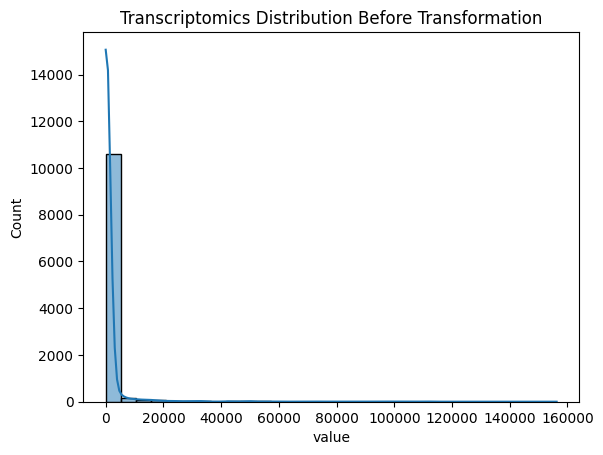

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [65]:
Q1 = final_kc["value"].quantile(0.25)
Q3 = final_kc["value"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
final_kc= final_kc[(final_kc["value"] >= lower_bound) & (final_kc["value"] <= upper_bound)]


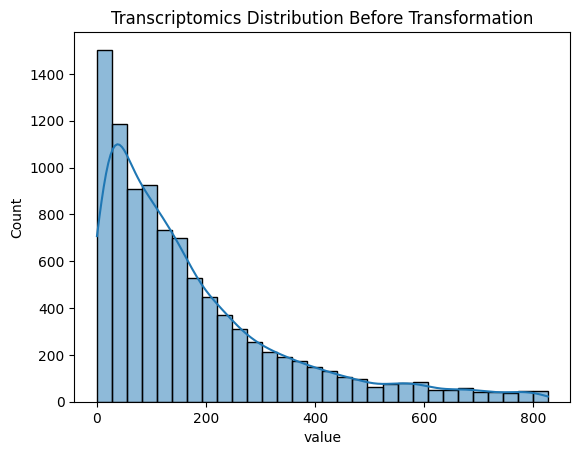

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(final_kc["value"], kde=True, bins=30)
plt.title("Transcriptomics Distribution Before Transformation")
plt.show()

In [67]:
#remove values less than 0.09 :
#final_kc_final = final_kc[final_kc["value"] >=1]
#final_kc_final

In [68]:
#remove values greater than 7.09:
#final_kc_final= final_kc_final[final_kc_final["value"] <= 10]
#final_kc_final

In [69]:
#sort values descending:
final_kc_final= final_kc.sort_values(by = "value", ascending = False)
final_kc_final


,sample,value,feature,view,group
1383,"""ID_12605""",827.046549,Gm15500__ENSMUSG00000086583.3,transcriptomics_KC,group_C
1889,"""ID_12635""",826.732946,Ifitm2__ENSMUSG00000060591.9,transcriptomics_KC,group_C
1721,"""ID_12635""",826.258210,Slc39a1__ENSMUSG00000052310.9,transcriptomics_KC,group_C
1583,"""ID_12632""",824.792750,mt-Te__ENSMUSG00000064369.1,transcriptomics_KC,group_C
910,"""ID_12604""",824.129424,Ifitm3__ENSMUSG00000025492.6,transcriptomics_KC,group_C
...,...,...,...,...,...
5330,"""ID_12596""",0.131593,Gm12715__ENSMUSG00000059195.10,transcriptomics_KC,group_C
8874,"""ID_12669""",0.122173,Retnlg__ENSMUSG00000022651.5,transcriptomics_KC,group_C
3715,"""ID_12681""",0.102736,Camp__ENSMUSG00000038357.10,transcriptomics_KC,group_C
10187,"""ID_12678""",0.069156,Spp1__ENSMUSG00000029304.14,transcriptomics_KC,group_C


In [70]:
#select the first 7000 values:
#final_kc_final = final_kc_final.iloc[:10000]
#print(final_kc_final)

--------------------------------------------------------------------------------------------------------------------

In [71]:
merged_df = pd.concat([final_lipodomics, final_transcriptomics_hc, final_kc_final], ignore_index=True)
merged_df

,sample,value,feature,view,group
0,HFDHFDHFD_ko_10,14.011117,TAG(54:5)_TAG2,Lipidomics,group_A
1,HFDHFDHFD_ko_10,14.005182,TAG(54:4)_TAG2,Lipidomics,group_A
2,HFDCDCD_wt_42,13.985635,TAG(54:4)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_4,13.973855,TAG(56:7)_TAG2,Lipidomics,group_A
4,HFDHFDHFD_ko_30,13.940648,TAG(50:1)_TAG,Lipidomics,group_A
...,...,...,...,...,...
29192,"""ID_12596""",0.131593,Gm12715__ENSMUSG00000059195.10,transcriptomics_KC,group_C
29193,"""ID_12669""",0.122173,Retnlg__ENSMUSG00000022651.5,transcriptomics_KC,group_C
29194,"""ID_12681""",0.102736,Camp__ENSMUSG00000038357.10,transcriptomics_KC,group_C
29195,"""ID_12678""",0.069156,Spp1__ENSMUSG00000029304.14,transcriptomics_KC,group_C


In [72]:
#remove high variable features
# Ensure all data is numeric
numeric_data = merged_df.select_dtypes(include=[np.number])
feature_variances = numeric_data.var(axis=0)
feature_variances



value    16968.873832
dtype: float64

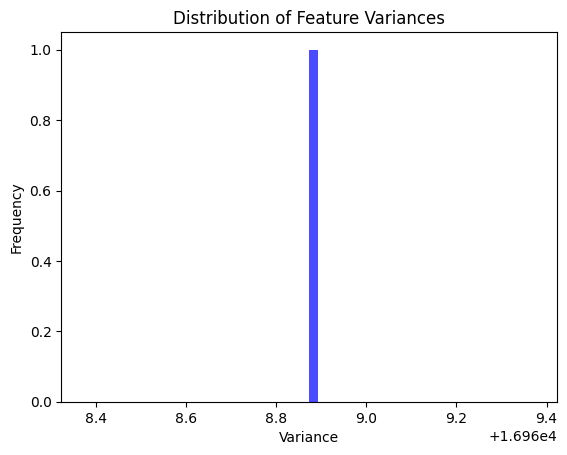

In [73]:
import matplotlib.pyplot as plt


plt.hist(feature_variances, bins=50, color='blue', alpha=0.7)
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Variances')
plt.show()

In [74]:
merged_df['value'].describe()

count    29197.000000
mean        82.647253
std        130.264630
min         -0.038046
25%          5.081238
50%         23.540301
75%        107.674562
max        827.046549
Name: value, dtype: float64

In [75]:
#set data options:

ent.set_data_options(scale_views = True)  

Scaling views to unit variance...



In [76]:
merged_df = merged_df.drop_duplicates(subset=['group', 'view', 'feature', 'sample'], keep='first')

merged_df

,sample,value,feature,view,group
0,HFDHFDHFD_ko_10,14.011117,TAG(54:5)_TAG2,Lipidomics,group_A
1,HFDHFDHFD_ko_10,14.005182,TAG(54:4)_TAG2,Lipidomics,group_A
2,HFDCDCD_wt_42,13.985635,TAG(54:4)_TAG2,Lipidomics,group_A
3,HFDHFDHFD_ko_4,13.973855,TAG(56:7)_TAG2,Lipidomics,group_A
4,HFDHFDHFD_ko_30,13.940648,TAG(50:1)_TAG,Lipidomics,group_A
...,...,...,...,...,...
29192,"""ID_12596""",0.131593,Gm12715__ENSMUSG00000059195.10,transcriptomics_KC,group_C
29193,"""ID_12669""",0.122173,Retnlg__ENSMUSG00000022651.5,transcriptomics_KC,group_C
29194,"""ID_12681""",0.102736,Camp__ENSMUSG00000038357.10,transcriptomics_KC,group_C
29195,"""ID_12678""",0.069156,Spp1__ENSMUSG00000029304.14,transcriptomics_KC,group_C


In [77]:
# Set the data for MOFA+
ent.set_data_df(merged_df)



Loaded group='group_A' view='Lipidomics' with N=29 samples and D=400 features...
No data found for group='group_A' and view='transcriptomics_KC'...
No data found for group='group_A' and view='transcriptomics_hc'...
No data found for group='group_B' and view='Lipidomics'...
No data found for group='group_B' and view='transcriptomics_KC'...
Loaded group='group_B' view='transcriptomics_hc' with N=29 samples and D=379 features...
No data found for group='group_C' and view='Lipidomics'...
Loaded group='group_C' view='transcriptomics_KC' with N=28 samples and D=385 features...
No data found for group='group_C' and view='transcriptomics_hc'...




In [78]:
#set model options
ent.set_model_options(
    factors= 10,
    spikeslab_weights=True,
    ard_weights=True
)


Model options:
- Automatic Relevance Determination prior on the factors: False
- Automatic Relevance Determination prior on the weights: True
- Spike-and-slab prior on the factors: False
- Spike-and-slab prior on the weights: True
Likelihoods:
- View 0 (Lipidomics): gaussian
- View 1 (transcriptomics_KC): gaussian
- View 2 (transcriptomics_hc): gaussian




In [79]:
#set training options
ent.set_train_options(
    convergence_mode="fast",
    dropR2=0.001,
    gpu_mode=False,
    seed=1
    )

In [80]:
ent.build()
ent.run()

ent.save("s_factor_10_filter_20%_wt&ko_mofa_model.hdf5")


######################################
## Training the model with seed 1 ##
######################################


ELBO before training: -253191.40 

Iteration 1: time=0.02, ELBO=-49803.54, deltaELBO=203387.861 (80.32968694%), Factors=9
Iteration 2: time=0.02, ELBO=-39143.55, deltaELBO=10659.993 (4.21025068%), Factors=9
Iteration 3: time=0.02, ELBO=-35932.36, deltaELBO=3211.193 (1.26828672%), Factors=9
Iteration 4: time=0.02, ELBO=-34257.43, deltaELBO=1674.923 (0.66152437%), Factors=9
Iteration 5: time=0.02, ELBO=-31738.34, deltaELBO=2519.097 (0.99493762%), Factors=9
Iteration 6: time=0.02, ELBO=-30423.53, deltaELBO=1314.811 (0.51929524%), Factors=9
Iteration 7: time=0.02, ELBO=-29473.63, deltaELBO=949.900 (0.37517054%), Factors=9
Iteration 8: time=0.02, ELBO=-28574.33, deltaELBO=899.298 (0.35518522%), Factors=9
Iteration 9: time=0.02, ELBO=-27876.15, deltaELBO=698.178 (0.27575098%), Factors=9
Iteration 10: time=0.02, ELBO=-27419.99, deltaELBO=456.162 (0.18016494%), Factors=9
Iterat